# Retail Price Prediction XGboost Vs Random Forest Comparison

# PROBLEM STATEMENT/GOAL

The aim is to forecast weekly sales from a particular department. The objective of this case study is to forecast weekly retail store sales based on historical data. This model will be able to inform shareholders given a set of variables approximately what kind of sales they could hope to get. How these features interact with each other and what the sales outcome would be with these interactions. This is essential as it can help shareholders in determining what type of stores to invest in, their location and performance.

- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

Process:
1. Data preparation
2. Exploratory data analysis
3. Hyperparameter tuning
4. Metrics and Results
5. Model Interpretation with SHAP

# 1. Data Preparation

Since this projet is made up of 3 data sets first each of the data sets are viewed to access properties and data types. The three data sets are then merged, which produced a final table size of 421,570 instances and 14 features.

Since the date column was not in the correct format and was changed into date time object which is a module recognized by python and can be used for manipulation of dates and times. 

In this study we will not use time chronologically (time series) but to create a new variable called “month” to determine the sales by month. 

Nulls were visualized, it was found the only missing values were in the dates related to markdowns which are expected as sales are not run daily. These were changed to 0 numeric values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [3]:
# Let's explore the 3 dataframes
# "stores" dataframe contains information related to the 45 stores such as type and size of store.

stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales['Dept'].unique()
sales.shape

(421570, 5)

### EXPLORE INDIVIDUAL DATASET

In [6]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
# Change the datatype of 'date' column

feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [13]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [14]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


### MERGE DATASET INTO ONE DATAFRAME

In [15]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [16]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])

In [18]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [20]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [23]:
x = '2010-05-02'
str(x).split('-')

['2010', '05', '02']

In [24]:
def get_month(x):
    return int(str(x).split('-')[1])

In [25]:
df['month'] = df['Date'].apply(get_month)

In [26]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


### EXPLORE MERGED DATASET

<AxesSubplot:>

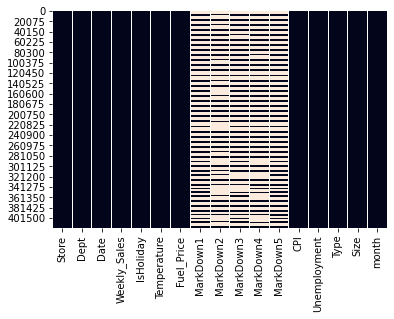

In [27]:
sns.heatmap(df.isnull(), cbar = False)

In [28]:
# check the number of non-null values in the dataframe
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [29]:
# Fill up NaN elements with zeros
df = df.fillna(0)

In [30]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


In [31]:
# Statistical summary of the combined dataframe
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.478580
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.324757
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000


In [32]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()

0

In [33]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

- Replace the "IsHoliday" with ones and zeros instead of True and False (characters with numbers)


In [34]:
df['IsHoliday']= df['IsHoliday'].replace({True:1,False:0})

In [35]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


# 2. PERFORM EXPLORATORY DATA ANALYSIS
The objective of data exploration is to visualize the data to see which algorithm may more suitable. In this Study we look at pearson correlation plots, distribution plots to see if any variables may need transformation. Also from the analysis in this area we may be able to determine which machine learning model would best fit the data. Linear regression is more suitable when there is normal distribution and little correaltion between features, While tree based plots are robust to these are characteristics of the data. Tree based models are robust to outliers, different scale range between features.

In [36]:
# Create pivot tables to understand the relationship in the data

result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= np.mean)

In [37]:
result

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [38]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [39]:
result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})

In [40]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-01-10 1     1         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 2         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 3         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 4         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 5         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    93     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 94     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 95     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 97     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 98     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-01-10 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-12-10 45    93     3990.54 NaN  
                 94     3990.54 NaN  
                 95     3990.54 NaN  
                 97     3990.54 NaN  
                 98     3990.54 NaN  

[421570 rows x 10 columns]

In [41]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [42]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday.

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [43]:
corr_matrix = df.drop(columns = ['Store']).corr()

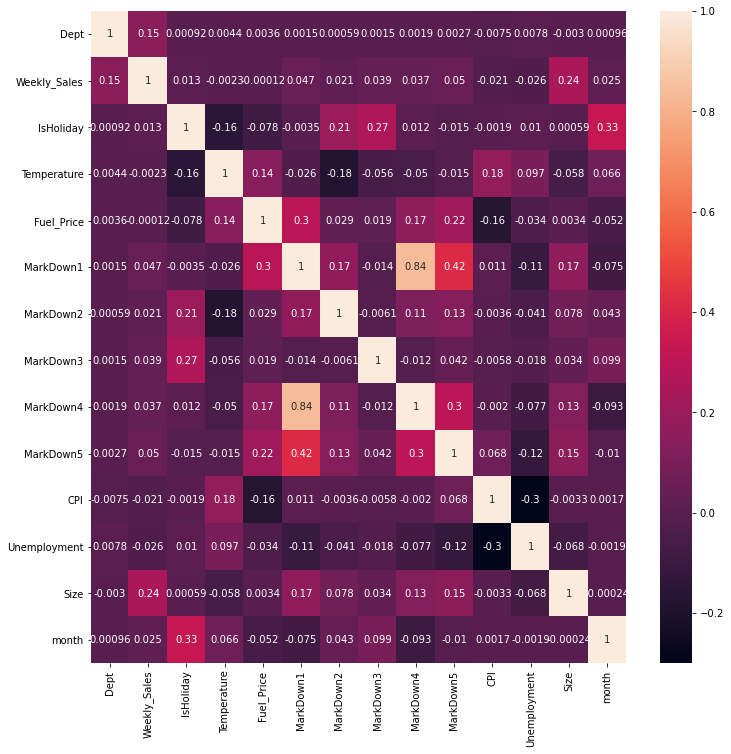

In [44]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# 7: PERFORM DATA VISUALIZATION

In [96]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>],
       [<AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

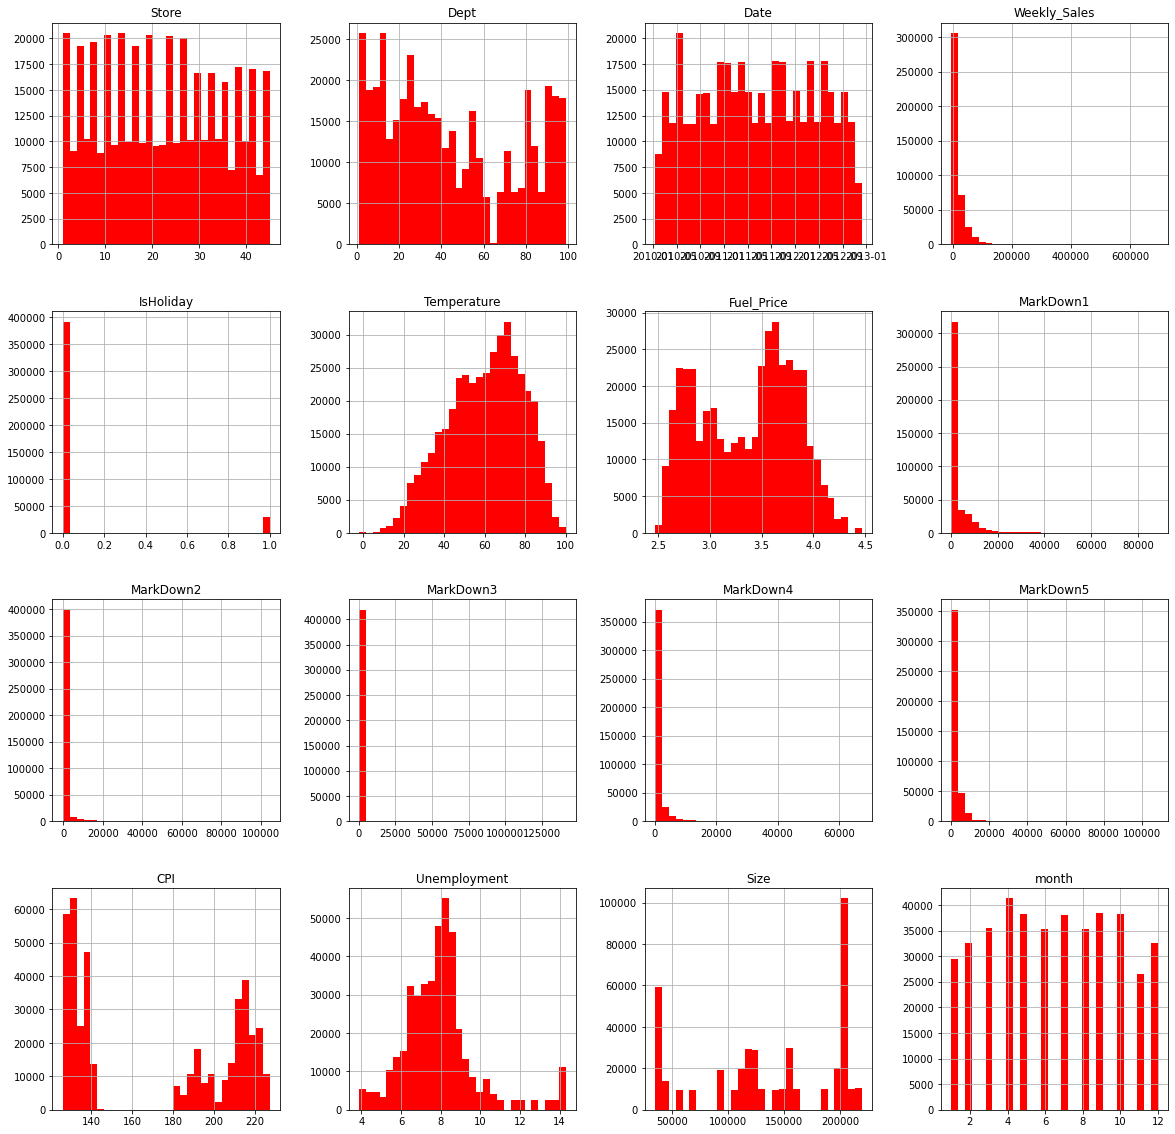

In [46]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

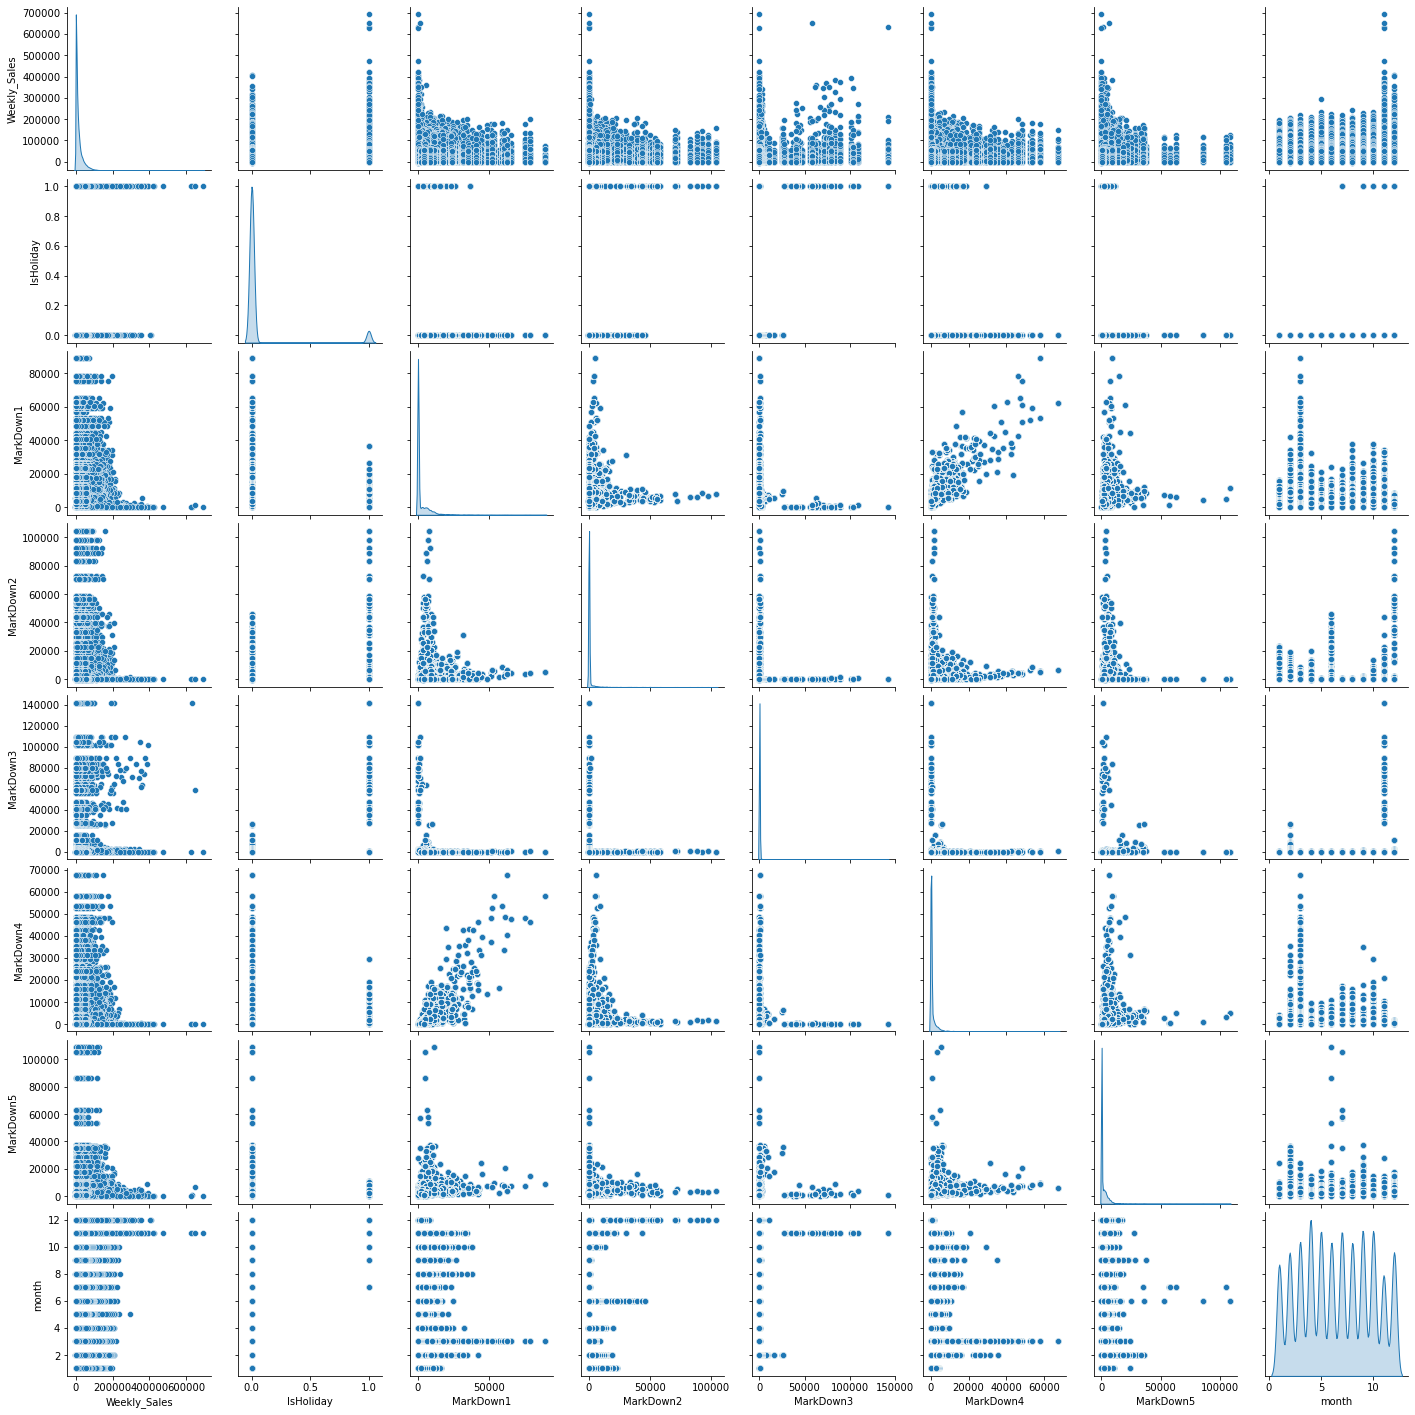

In [47]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

For many machine learning algorithms, using correlated features is not a good idea. It may sometimes make prediction less accurate, and most of the time make interpretation of the model almost impossible. GLM, for instance, assumes that the features are uncorrelated.

After looking at the pair plot we see that the variables are not highly correlated, all features except markdown1 and markdown4 have low correlation. From the Pearson correlation heat map we can see there is a 0.84 correlation between these two variables. 

The distributions are not normal hence a linear regression model would not be suitable, a tree based model will be a better fit.

 Fortunately, decision tree algorithms (including boosted trees) are very robust to these features. Therefore we have nothing to do to manage this situation.
One hot encoding was performed on variables: IsHoliday, Department, and store. Their were over 80 departments and 40 stores so this action increased the features significantly. This is to change the variables to nominal numeric features.

In [48]:
df_type = df.groupby('Type').mean()

In [49]:
df_type

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Type,,,,,,,,,,,,,,,
A,21.736419,44.622156,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.480030
B,18.450417,43.112273,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.478100
C,38.942015,46.836350,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.473085


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

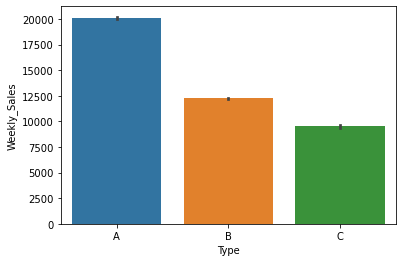

In [50]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [51]:
# df_dept = df.drop(columns = ['Store','Type','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Size','month'])
df_dept = df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Dept,,,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
2,23.000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
3,23.000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
4,23.000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
5,22.757366,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.479439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
96,23.258138,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.482489
97,23.357439,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.477700


In [52]:
df_depts = pd.pivot_table(df,
                        values = ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],
                        index = ['Dept'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_depts.style.background_gradient(cmap=cm)

In [53]:
df_depts = pd.pivot_table(df,
                        values = ['Temperature','Fuel_Price','Weekly_Sales'],
                        index = ['month'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_depts.style.background_gradient(cmap=cm)

Text(0.5, 0, 'Department')

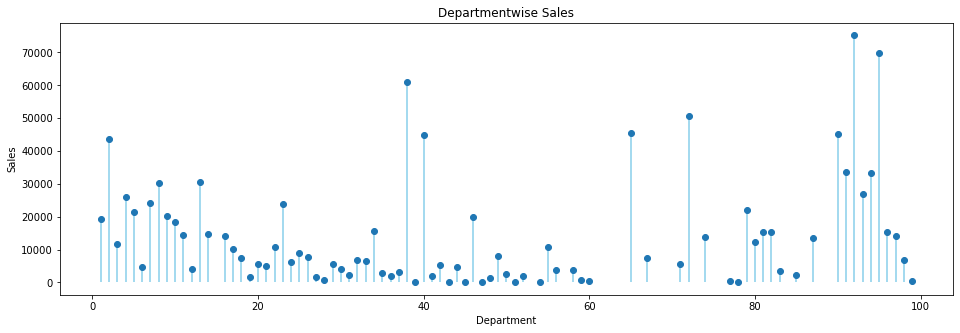

In [54]:
fig1, ax1 = plt.subplots(figsize=(16, 5))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=df_dept.index, ymin=0, ymax=df_dept['Weekly_Sales'], color='skyblue')
plt.plot(df_dept.index,df_dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [55]:
df2_1 = pd.get_dummies(df, columns = ['Dept'], drop_first = True)
df2_1 = df2_1.drop(columns = ['Date'])

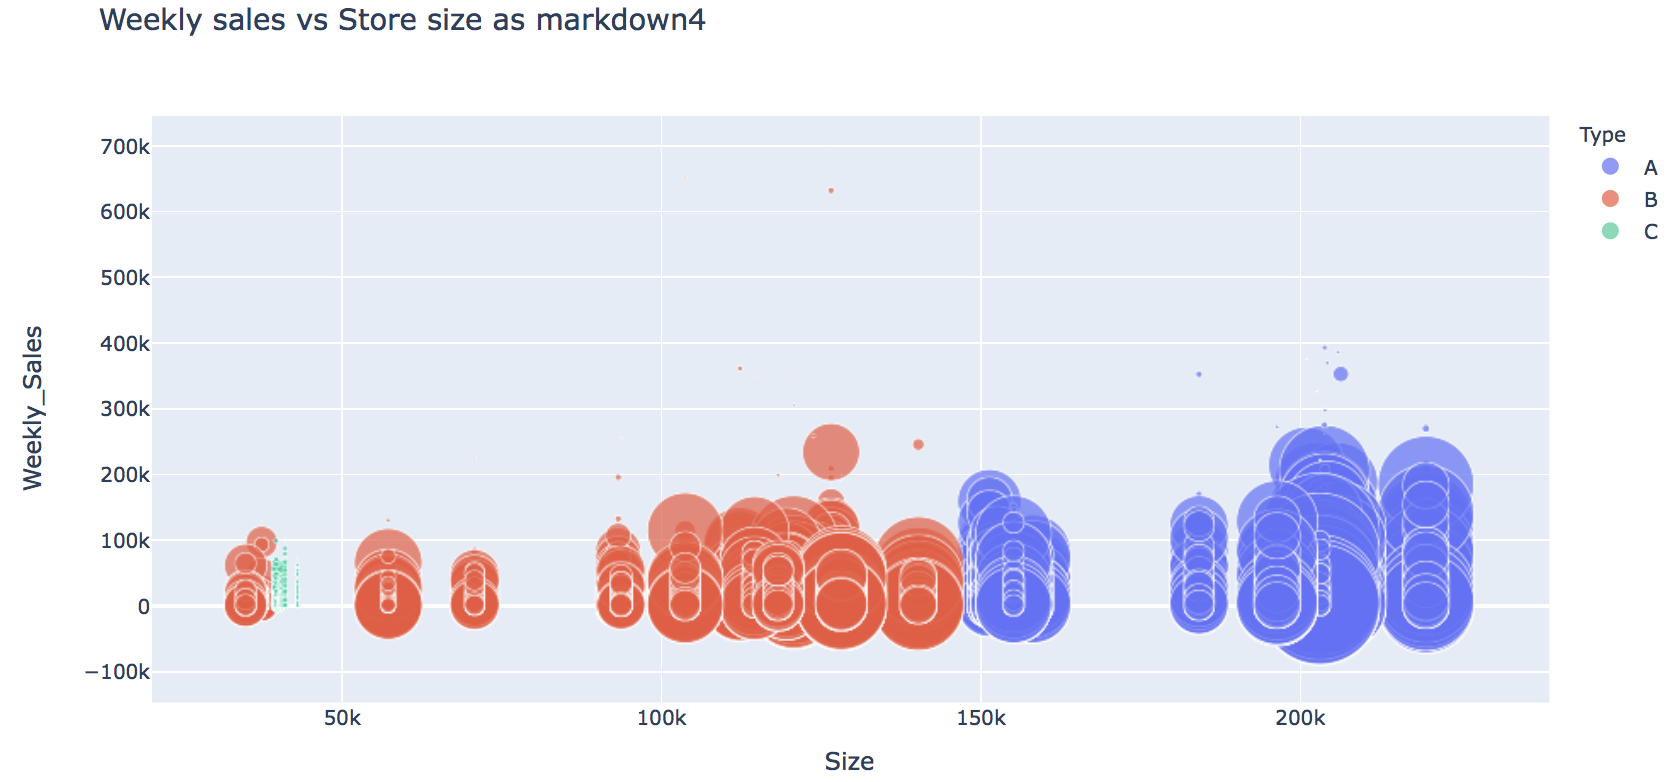

In [54]:
import plotly.express as px
from IPython.display import Image
df3 = df

fig = px.scatter(df3.query("IsHoliday==1"), x="Size", y="Weekly_Sales",
	         size="MarkDown4", color="Type",
                 hover_name="Store", size_max=50,title = 'Weekly sales vs Store size as markdown4')
#fig.show()
Image(filename = 'weeklysalesvstemp.png')

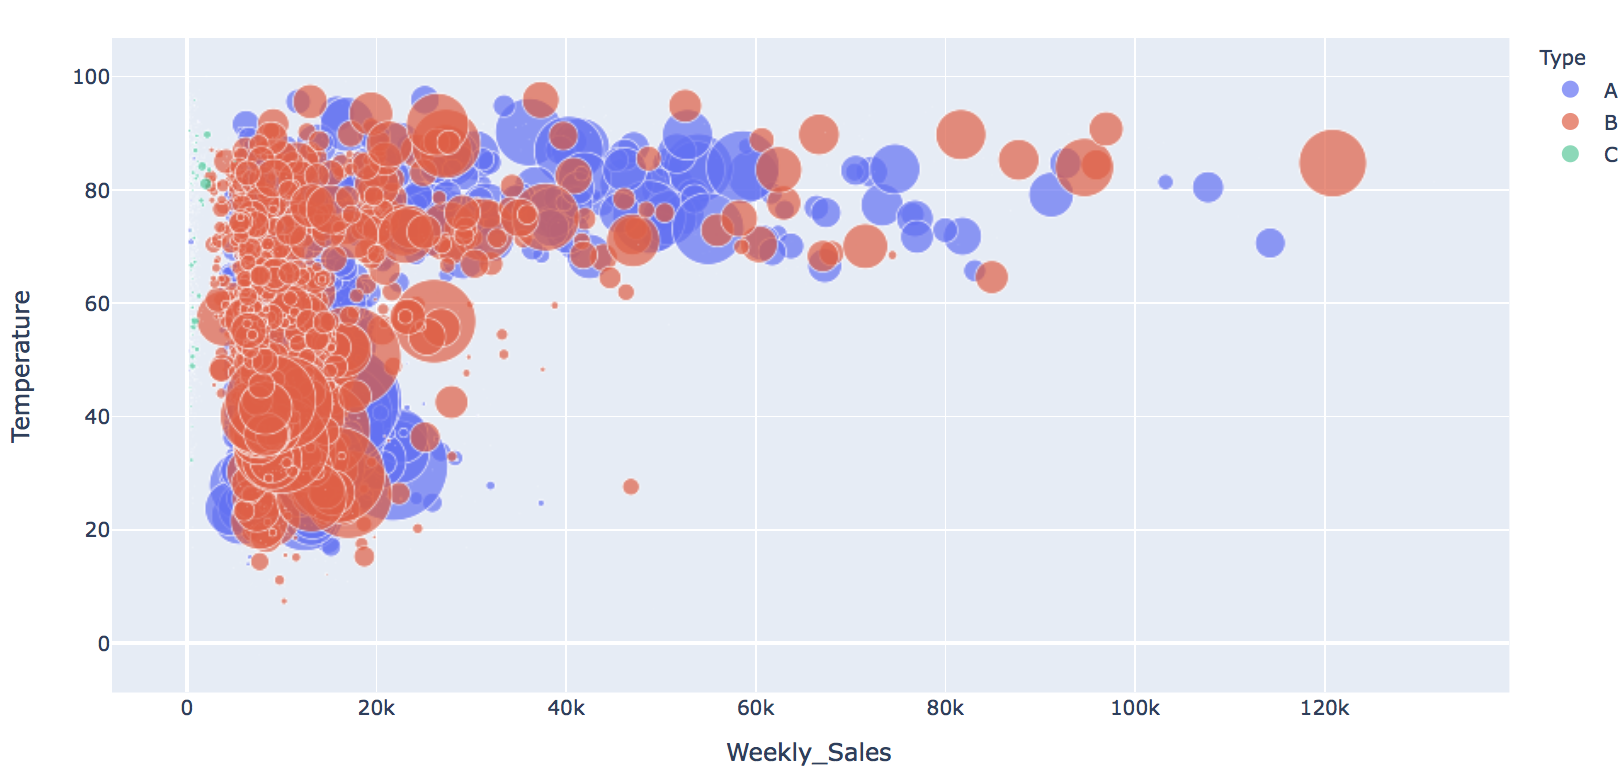

In [56]:
import plotly.express as px
df3 = df

fig = px.scatter(df3.query("Dept==3"), x="Weekly_Sales", y="Temperature",
	         size="MarkDown4", color="Type",
                 hover_name="Store", size_max=50)
#fig.show()
Image(filename = 'weeklysalesvstemp3.png')

In this plot we can see that at high temperatures Department 3 gives out markdowns even though the weekly sales are high, hence department 3 does not only give markdown when sales are low as we can see in is the case in the department 99 below.

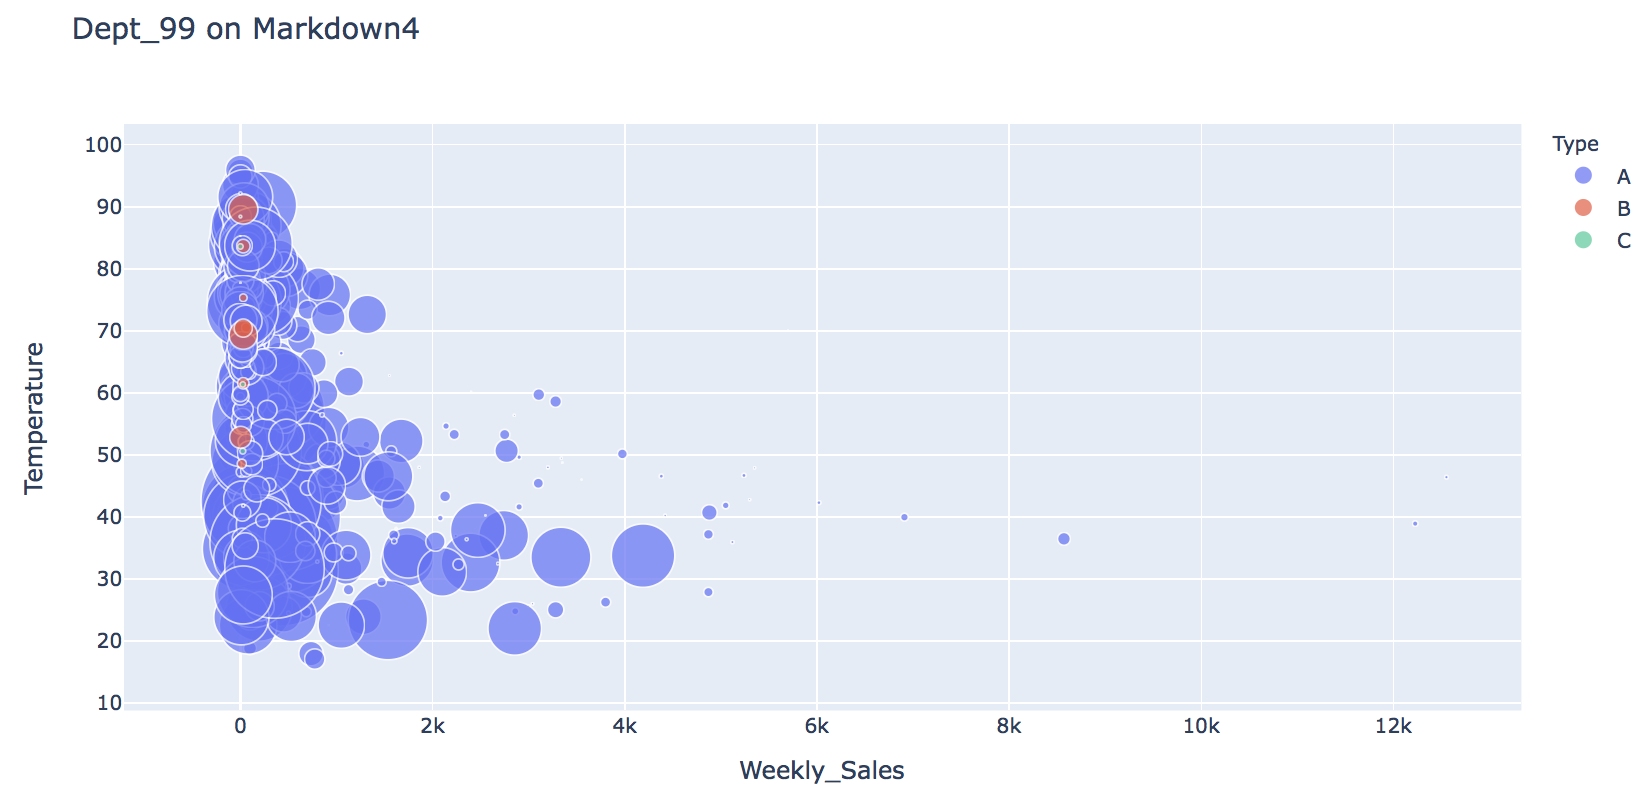

In [57]:
import plotly.express as px
df3 = df

fig = px.scatter(df3.query("Dept==99"), x="Weekly_Sales", y="Temperature",
	         size="MarkDown4", color="Type",
                 hover_name="Store", size_max=50,title = 'Dept_99 on Markdown4')
#fig.show()
Image(filename = 'weeklysalesvstemp4.png')

In this plot we can see that department 99 has low weekly sales since most data points are below the 2000 sales range. The size of the points indicate markdown4 size (Markdowns indicates when there are sales). This implies that more markdowns are given to this department since it has low sales. at all tempratures the markdowns seem to be the same so temperature has no effect on the markdown allocation.

### PREPARE THE DATA BEFORE TRAINING

In [58]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])
df_final_1 = df.drop(columns = ['Weekly_Sales', 'Date','Dept'])

In [59]:
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)
df_final_1 = pd.get_dummies(df_final_1, columns = ['Type', 'Store'], drop_first = True)

In [60]:
df_final.shape

(421570, 138)

In [61]:
df_target.shape

(421570,)

In [62]:
df_final.columns

Index(['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       ...
       'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95',
       'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99'],
      dtype='object', length=138)

In [63]:
X = np.array(df_final).astype('float32')
X1 = np.array(df_final_1).astype('float32')
y = np.array(df_target).astype('float32')

y_rf = np.array(df_target).astype('float32')
y_rf = y_rf[:50000]
X_rf = X[:50000]

In [64]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [65]:
# scaling the data before feeding the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)

# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [66]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
rfX_train, rfX_test, rfy_train, rfy_test = train_test_split(X_rf, y_rf, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [67]:
X_train

array([[ 0.   , 43.96 ,  2.514, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 79.44 ,  2.705, ...,  0.   ,  1.   ,  0.   ],
       [ 0.   , 79.97 ,  3.972, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 43.47 ,  3.157, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 38.71 ,  3.176, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 70.92 ,  3.645, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

# 3. Hyperparameter Tuning

XGBoost Regressor hyperparameters were max_depth, n_estimators and learning rate. max_depth indicates the depth degree of the estimators (trees in this case). This parameter should be tuned with caution as it can cause the model to overfit. n_estimators which are the number of estimators the model will be built upon. Learning rate is used to control and adjust the weighting of the internal model estimators. The learning_rate should always be a small value to force long-term learning. An sklearn auto tuning package (GridsearchCV) was selected to iterate over the chosen values and the best value was selected, which was 100 number of estimators, 1.0 learning rate, max depth of 5 trees.

While the hyperparameters chosen for Random Forest Regressor were n_estimators which are The number of trees in the forest, max_depth which specifies the maximum depth of the tree, max_features which is the number of features to consider when looking for the best split. Max features is useful for reducing the training for data sets with large number of features, or can be helpful in curbing overfitting since a higher selection of trees can help reduce overfitting. The maximum tree variable is another metric that reduces overfitting.

In [69]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Rf_model = RandomForestRegressor(n_estimators=3, max_depth=5)

hyperparameters = {
     'n_estimators': [40,70],
     'max_features': ['sqrt', 'log2']}

clf = GridSearchCV(Rf_model, hyperparameters, cv=3)

clf.fit(rfX_train, rfy_train)

best_params = clf.best_params_
rf_results = clf.best_score_

print(best_params)
print(rf_results)

{'max_features': 'sqrt', 'n_estimators': 70}
0.39501788713011693


In [70]:
# Train an XGBoost regressor model 



Rf_model = RandomForestRegressor(n_estimators=70, max_depth=5,)

#Rf_scores = cross_val_score(Rf_model, X=rfX_train, y=rfy_train, cv=3, n_jobs=1)

#print('Cross Validation accuracy scores: %s' % Rf_scores)

Rf_model.fit(rfX_train, rfy_train)

result = Rf_model.score(rfX_train, rfy_train)

print("Accuracy : {}".format(result))

Accuracy : 0.5927255803462693


In [71]:
# make predictions on the test data
#from sklearn.model_selection import cross_val_score, cross_val_predict

#Rf_y_pred = cross_val_predict(Rf_model, rfX_test, rfy_test, cv=3)

Rf_y_pred = Rf_model.predict(rfX_test)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = rfX_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(rfy_test, Rf_y_pred)),'.3f'))
MSE = mean_squared_error(rfy_test, Rf_y_pred)
MAE = mean_absolute_error(rfy_test, Rf_y_pred)
r2 = r2_score(rfy_test, Rf_y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 17618.769 
MSE = 310421028.5059184 
MAE = 11776.812408535525 
R2 = 0.6023605547691285 
Adjusted R2 = 0.600617353160378


In [73]:
Xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth = 5, n_estimators = 3)

hyperparameters = {
     'n_estimators': [50,100],
     'learning_rate': [0.1, 1.0, 2.0]}

xgb_clf = GridSearchCV(Xgb_model, hyperparameters, cv=3)

xgb_clf.fit(rfX_train, rfy_train)

xgb_best_params = xgb_clf.best_params_
xgb_results = xgb_clf.best_score_

print(xgb_best_params)
print(xgb_results)

{'learning_rate': 1.0, 'n_estimators': 100}
0.9513783900368927


In [74]:
Xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1.0, max_depth = 5, n_estimators = 100)

Xgb_scores = cross_val_score(Xgb_model, X=rfX_train, y=rfy_train, cv=5, n_jobs=1)

print('Cross Validation accuracy scores: %s' % Xgb_scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(Xgb_scores),np.std(Xgb_scores)))

Cross Validation accuracy scores: [0.95603553 0.95631261 0.96424599 0.94616152 0.95696296]
Cross Validation accuracy: 0.956 +/- 0.006


In [75]:
# make predictions on the test data
from sklearn.model_selection import cross_val_score, cross_val_predict

Xgb_y_pred = cross_val_predict(Xgb_model, rfX_test, rfy_test, cv=3)

#y_predict = Xgb_model.cross_val_predict(X_test)

In [76]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(rfy_test, Xgb_y_pred)),'.3f'))
MSE = mean_squared_error(rfy_test, Xgb_y_pred)
MAE = mean_absolute_error(rfy_test, Xgb_y_pred)
r2 = r2_score(rfy_test, Xgb_y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6674.95 
MSE = 44554950.0 
MAE = 3377.7446 
R2 = 0.9429265229728527 
Adjusted R2 = 0.94267631998579


# 4. Metrics and Results

XGBoost is a supervised learning algorithm and implements gradient boosted trees algorithm. The algorithm work by combining an ensemble of predictions from several weak models. it gives more importance to misclassified observations. Intuitively, new weak learners are added to concentrate on the areas where the existing learners are performing poorly. The contribution of each weak learner to the final prediction is based on a gradient optimization process to minimize the overall error of the strong learner. The algorithm reduces the residual error by comparing previous tree. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals. Boosting happens to be iterative learning which means the model will predict something initially and self analyses its mistakes as a predictive toiler and give more weightage to the data points in which it made a wrong prediction in the next iteration.

Random Forest is a bagging technique that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.” Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
Bagging decreases overall variance by averaging the performance of multiple estimates. Aggregate several sampling subsets of the original dataset to train different learners chosen randomly with replacement, which conforms to the core idea of bootstrap aggregation. Bagging normally uses averaging for regression.

From results below we can see that the XGboost model performs better in all compared metrics. Regression metrics are better when the value is lower RMSE for XGboost is 6674 compared to 17618 of Random Forest model, and is in line with the low R and Adjusted R values since these metrics tells us how much the model could interprete from the chosen features.

### Results

### Random Forest
RMSE = 17618.769 <br> 
MSE = 310421028.5059184 <br> 
MAE = 11776.812408535525 <br> 
R2 = 0.6023605547691285 <br> 
Adjusted R2 = 0.600617353160378<br> 

### XGboost
RMSE = 6674.95 <br> 
MSE = 44554950.0 <br> 
MAE = 3377.7446 <br> 
R2 = 0.9429265229728527 <br> 
Adjusted R2 = 0.94267631998579<br> 

#### RMSE: 
Root Mean Square Error is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
MSE: Mean square error is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. One problem with this metric is that it is not robust to outliers.


#### MAE: 
Mean absolute error is a very simple metric which calculates the absolute difference between actual and predicted values. MAE is not sensitive towards outliers and given several examples with the same input feature values, and the optimal prediction will be their median target value. This should be compared with Mean Squared Error, where the optimal prediction is the mean. A disadvantage of MAE is that the gradient magnitude is not dependent on the error size, only on the sign of y - ŷ. This leads to that the gradient magnitude will be large even when the error is small, which in turn can lead to convergence problems. Most useful when there are outliers in the data.

#### R2: 
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable.
An R-squared of 100% means that all movements of a security (or other dependent variables) are completely explained by movements in the index (or the independent variable(s) you are interested in.

#### Adj R2: 
Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.
Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.


In [77]:
import shap 
shap.initjs()

# 5. Model Interpretation

The Packages used for interpretability is SHAP. SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley values. TreeSHAP, an efficient estimation approach for tree-based models. SHAP comes with many global interpretation methods based on aggregations of Shapley values. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalition game theory. The feature values of a data instance act as players in a coalition.

Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features. The plot below shows the feature importance of the most influential features in the model. The model chosen for interpretation is the Xgboost model as this is the best performing model. These value showed on the figures are predicted values from the test set.

In [78]:
xg_target = df_target[:50000]
xg_final = df_final[:50000]
xgX_train, xgX_test, xgy_train, xgy_test = train_test_split(xg_final, xg_target, test_size = 0.15)

In [79]:
Xg_model = Xgb_model.fit(xgX_train, xgy_train)
explainer = shap.Explainer(Xg_model)

In [80]:
shap_values = explainer(xgX_test, check_additivity=False)

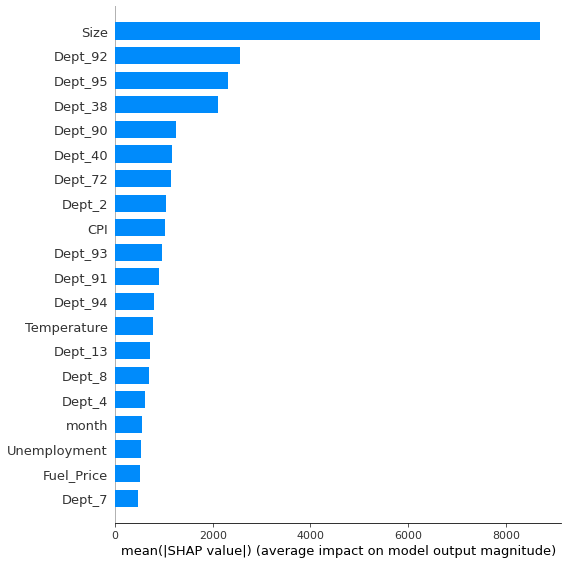

In [81]:
shap.summary_plot(shap_values, xgX_test, plot_type="bar")

Figure above shows the faetures by mean impact on the model. Size was the most important feature in the Xgboost model. This model depicts that the size of the store change the store price prediction averagely at a rate of 8000 dollars On the x axis. Following behind is the Dept_92 which seems to change the price predictions averagely about 2200 dollars

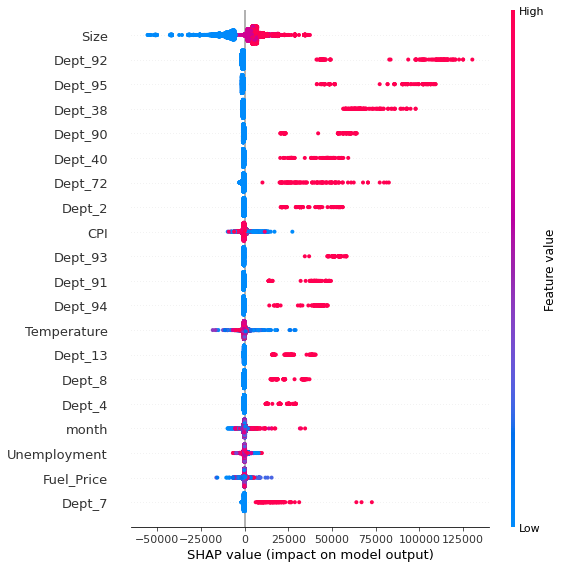

In [82]:
shap.summary_plot(shap_values, xgX_test)

the figure above is the summary plot which combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.
Fig4 smaller size of the store (Size Feature) the reduce the price predicted for that store. For the next most important metric the Dept_92 means that when the store has department 92 (ie the binary variable is set to 1) then it increase the price the prediction.

In [97]:
shap.initjs()
shap.force_plot(shap_values[6,:], xgX_test.iloc[6,:])

In [87]:
xgX_test.head(6)

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
37247,0,41.31,3.541,9777.71,4703.88,5.40,1179.72,9352.14,130.550207,4.607,...,0,0,0,0,0,0,0,0,0,0
14936,0,61.48,3.906,0.00,0.00,0.00,0.00,0.00,215.444871,7.931,...,0,0,0,0,0,0,0,0,0,0
18455,0,68.08,3.891,8994.04,6573.08,20.21,4162.20,1966.38,221.148403,6.891,...,0,0,0,0,0,0,0,0,0,0
10889,0,63.27,2.719,0.00,0.00,0.00,0.00,0.00,210.479887,8.200,...,1,0,0,0,0,0,0,0,0,0
16174,0,89.64,3.533,0.00,0.00,0.00,0.00,0.00,215.450863,7.852,...,0,0,0,0,0,0,0,0,1,0
29797,0,41.36,2.590,0.00,0.00,0.00,0.00,0.00,126.552286,8.623,...,0,0,0,0,0,0,0,0,0,0


In [88]:
pd.DataFrame(xgX_test.loc[29797,['Dept_29','Size','CPI','Dept_95','Dept_92','Dept_90','Dept_2','Dept_72']]).T

,Dept_29,Size,CPI,Dept_95,Dept_92,Dept_90,Dept_2,Dept_72
29797,0.0,205863.0,126.552286,0.0,0.0,0.0,0.0,0.0


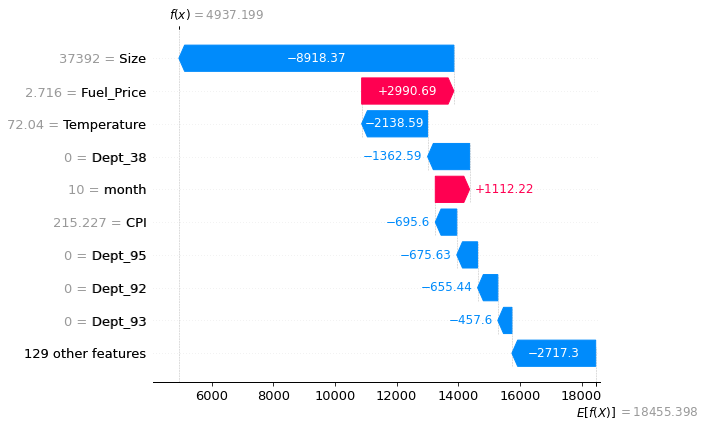

In [90]:
shap.plots.waterfall(shap_values[6])

In [98]:
shap.force_plot(shap_values[75,:], xgX_test.iloc[75,:])

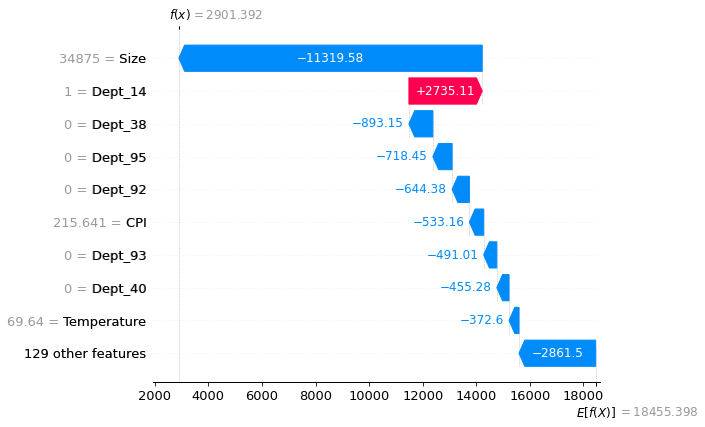

In [92]:
shap.plots.waterfall(shap_values[75])

In [99]:
shap.plots.force(shap_values[3])

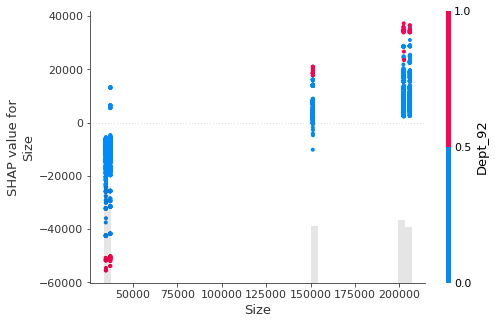

In [94]:
shap.plots.scatter(shap_values[:,"Size"], color=shap_values)

Figure Above is called a SHAP feature dependence plot. The interaction effect is the additional combined feature effect after accounting for the individual feature effects. This features automatically colors the feature with the strongest interaction that variable has. Fig5 shows that at very low sizes of the store (Size feature) the store having department 92, reduces the size predicted of that store, also at very large sizes of the store the store having department 92 (Dept_92 = 1) it increases the probability that the store is large in size.

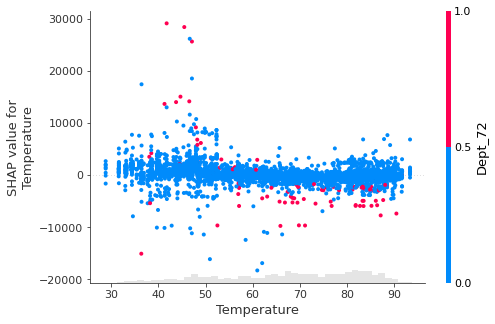

In [95]:
shap.plots.scatter(shap_values[:,"Temperature"], color=shap_values)